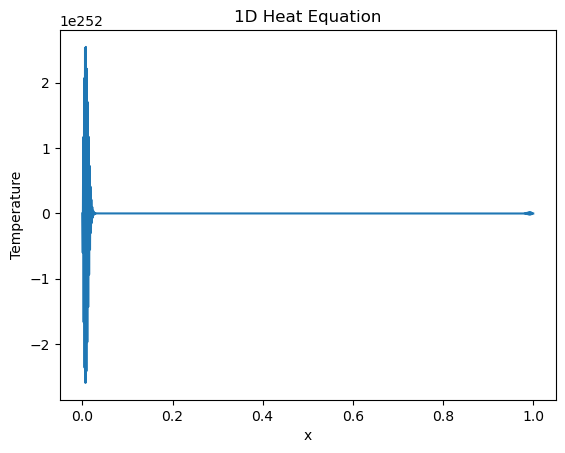

In [8]:
# We begin by considering a partial differential equation with only one
# spatial direction. This is basically a 1D boundary value once we discretise
# time.
# Consider the the one dimensional heat equation
# ∂f(x,t)/∂t = ∂^2f(x,t)/∂x^2
# with boundary conditions f(0, t) = 1 and ∂_x f(1, t) = 0. This means that
# we keep the left end at temperature 1 and let no heat escape or enter at the
# right end.
# The steady state of this equation is clearly f(x, t) = 1. We will
# consider the time evolution starting from f(x, 0) = e^−5x.
# Using implicit time discretisation we have
# f_{t+dt}(x) = f_t (x) + f_{t+dt}'' (x) dt.

# Use a second order finite difference scheme to turn the above into
# a linear algebra problem using N = 1000 grid points.

#a 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of grid points
L = 1.0   # Length of the domain
T = 1.0   # Total simulation time
alpha = 1.0  # Diffusion coefficient
dt = 0.0001  # Time step size
dx = L / (N - 1)

# Initialize grid and initial condition
x = np.linspace(0, L, N)
f = np.exp(-5 * x)  # Initial condition

# Implicit finite difference matrix coefficients
a = (1 + 2 * alpha * dt / dx**2)
b = -alpha * dt / dx**2

# Time evolution using implicit scheme
num_steps = 100
for _ in range(num_steps):
    f_new = np.zeros(N)
    f_new[0] = 1.0  # Boundary condition at x = 0
    for i in range(1, N - 1):
        f_new[i] = a * f[i] + b * (f[i + 1] + f[i - 1])
    f_new[N - 1] = f_new[N - 2]  # Neumann boundary condition at x = 1
    f = f_new

# Plot the final result
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('1D Heat Equation')
plt.show()
